<a href="https://colab.research.google.com/github/eclemente27/eclemente-data2000/blob/main/Clemente_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA-2000 Midterm Exam

## Recipe Rating Prediction

For this exercise, we are going to use a dataset of recipes and their ratings, taken from [the website Epicurious](https://www.epicurious.com/recipes-menus).

Our dataset contains basic information about the dish (its name, description, ingredients, and directions), as well as nutritional content (calories, protein, sodium, and fat contents). Based on this information, we want to try and predict how well or poorly the dish will be rated by users.


## Grading Rubric

This midterm will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Data Prep: 10 points
    - 5 points will be awarded for the actual data cleaning (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale for the data quality checks that you chose to use
  - Feature Engineering: 12 points
    - 2 points will be awarded by default, but may be subtracted from if there are substantial errors in your data prep that reduce the quality of your engineered features
    - 5 points will be awarded for the actual feature engineering (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Building: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your feature engineering that reduce the quality of your model
    - 5 points will be awarded for the actual model building (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 5 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not


## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [48]:
import pandas as pd

data = pd.read_json('https://cdn.c18l.org/full_format_recipes.json')

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
data.head() #looking at what the data all contains

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


## Data Prep & Cleaning

Perform any data quality checks and data cleaning that you believe is appropriate. Convert any categorical columns to numeric ones, if needed. Provide a narrative explanation of your choices to accompany any code.

In [51]:
#getting rid of the time that the recipe was posted, this will make it easier to organize the data by date without the time

import pandas as pd
data['date'] = pd.to_datetime(data['date']).dt.date

In [52]:
#selecting fewer columns and selecting variables that I think could best predict the rating of the recipe
#and reorganizing the order of columns to make it more meaningful with importance of information

new_data = data.loc[:,["title", "date", "categories", "rating", "fat", "protein", "sodium", "calories"]]


In [53]:
new_data.head()

,title,date,categories,rating,fat,protein,sodium,calories
0,"Lentil, Apple, and Turkey Wrap",2006-09-01,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2.500,7.0,30.0,559.0,426.0
1,Boudin Blanc Terrine with Red Onion Confit,2004-08-20,"[Food Processor, Onion, Pork, Bake, Bastille D...",4.375,23.0,18.0,1439.0,403.0
2,Potato and Fennel Soup Hodge,2004-08-20,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",3.750,7.0,6.0,165.0,165.0
3,Mahi-Mahi in Tomato Olive Sauce,2009-03-27,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",5.000,NaN,NaN,NaN,NaN
4,Spinach Noodle Casserole,2004-08-20,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",3.125,32.0,20.0,452.0,547.0


## Feature Engineering

Develop any new feature(s) that you feel may be relevant to a model. Provide a narrative explanation of your choices to accompany any code.

To help, I've included a `column_builder()` utility function that will create a new boolean column based on whether a string of text appears in any of (1) the recipe title; (2) the recipe description; or (3) the recipe tags.

In [54]:
def column_builder(category: str, dataset: pd.DataFrame) -> pd.DataFrame:
    dataset[f'is_{category}'] = ((
        dataset['categories'].str.contains(f'{category}', na=False, case=False)
    ) | (
        dataset['title'].str.contains(f'{category}', na=False, case=False)
    ) | (
        dataset['desc'].str.contains(f'{category}', na=False, case=False)
    )).astype(int)

    return dataset

#creating categories if the categories, title, or description contains these words
categories = [
    'easy',
    'breakfast',
    'lunch',
    'dinner'
    # Add any additional keywords here
]

for category in categories:
    new_data = column_builder(category, data)

new_data['is_easy'].describe()

count    20130.000000
mean         0.023746
std          0.152259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_easy, dtype: float64

In [55]:
new_data['is_lunch'].describe()

count    20130.000000
mean         0.005365
std          0.073052
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_lunch, dtype: float64

In [56]:
#adding a column with a boolean expression using fat and protein to determine if a recipe is healthy or not

new_data['healthy'] = (new_data['fat'] < 15) & (new_data['protein'] > 10)

In [57]:
#adding a column to show if a recipe is not dairy free by looking to see if the categories column contains dairy ingredients
new_data['not_dairy_free'] = new_data["categories"].str.contains == 'milk' or 'cheese' or 'dairy' or 'yogurt' or 'cream'

new_data['not_dairy_free'].describe()

count      20130
unique         1
top       cheese
freq       20130
Name: not_dairy_free, dtype: object

In [58]:
#changing healthy variable to a number to be able to use it nicely in a prediction format
#0 is true that it is healthy, 1 is false that it is not healthy

is_healthy = {val: idx for idx, val in enumerate(data['healthy'].unique())}

data['healthy'] = data['healthy'].replace(is_healthy)

In [59]:
new_data = new_data.loc[:,["title", "date", "categories", "fat","rating", "protein", "sodium", "calories", "is_easy", "is_breakfast", "is_lunch", "is_dinner", "healthy", "not_dairy_free"]]

In [60]:
new_data.head()

,title,date,categories,fat,rating,protein,sodium,calories,is_easy,is_breakfast,is_lunch,is_dinner,healthy,not_dairy_free
0,"Lentil, Apple, and Turkey Wrap",2006-09-01,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",7.0,2.500,30.0,559.0,426.0,0,0,0,0,0,cheese
1,Boudin Blanc Terrine with Red Onion Confit,2004-08-20,"[Food Processor, Onion, Pork, Bake, Bastille D...",23.0,4.375,18.0,1439.0,403.0,0,0,0,0,1,cheese
2,Potato and Fennel Soup Hodge,2004-08-20,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",7.0,3.750,6.0,165.0,165.0,0,0,0,0,1,cheese
3,Mahi-Mahi in Tomato Olive Sauce,2009-03-27,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,5.000,NaN,NaN,NaN,0,0,0,0,1,cheese
4,Spinach Noodle Casserole,2004-08-20,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",32.0,3.125,20.0,452.0,547.0,0,0,0,0,1,cheese


## Model Building

Build a model (either a regression or a neural network) to predict a recipe's rating based on any relevant attributes that you defined in the prior steps.

You may choose to predict rating as a continuous value (0.0 to 5.0), or as a categorical (low/medium/high or similar).

Provide a narrative explanation of your choices to accompany any code.

In [62]:
from sklearn.model_selection import train_test_split

target = new_data.pop('rating')
X_train, X_test, y_train, y_test = train_test_split(
    new_data,
    target,
    test_size=0.2,
    random_state=42)

In [68]:
# Keras Input tensors of float values.
inputs = {
    'is_easy':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_easy'),
    'healthy':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='healthy'),
    'is_lunch':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_lunch'),
    'is_dinner':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_dinner'),
    'is_breakfast':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_breakfast'),
}

In [91]:
#NOrmalizatoion layers to shift and scale inputs into a distrubtion centered around 0 and standard deviation around 1
#Using the mean square errors

is_easy = tf.keras.layers.Normalization(
    name='normalization_is_easy',
    axis=None)
is_easy.adapt(X_train['is_easy'])
is_easy = is_easy(inputs.get('is_easy'))

healthy = tf.keras.layers.Normalization(
    name='normalization_healthy',
    axis=None)
healthy.adapt(X_train['healthy'])
healthy = healthy(inputs.get('healthy'))

is_lunch = tf.keras.layers.Normalization(
    name='normalization_is_lunch',
    axis=None)
is_lunch.adapt(X_train['is_lunch'])
is_lunch = is_lunch(inputs.get('is_lunch'))

is_dinner = tf.keras.layers.Normalization(
    name='normalization_is_dinner',
    axis=None)
is_dinner.adapt(X_train['is_dinner'])
is_dinner = is_dinner(inputs.get('is_dinner'))

is_breakfast = tf.keras.layers.Normalization(
    name='normalization_is_breakfast',
    axis=None)
is_breakfast.adapt(X_train['is_breakfast'])
is_breakfast = is_breakfast(inputs.get('is_breakfast'))


In [92]:
preprocessing_layers = tf.keras.layers.Concatenate()([
    healthy,
    is_easy,
    is_dinner,
    is_lunch,
    is_breakfast
])

In [74]:
dense_output = tf.keras.layers.Dense(
    units=30,
    activation='relu',
    name='hidden_dense_layer_1')(preprocessing_layers)

# Create a Dense layer
dense_output = tf.keras.layers.Dense(
    units=15,
    activation='relu',
    name='hidden_dense_layer_2')(dense_output)

# Create the Dense output layer.
dense_output = tf.keras.layers.Dense(
    units=1,
    activation='relu',
    name='dense_output')(dense_output)

In [75]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=dense_output)
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.MeanSquaredError()]
)#create model

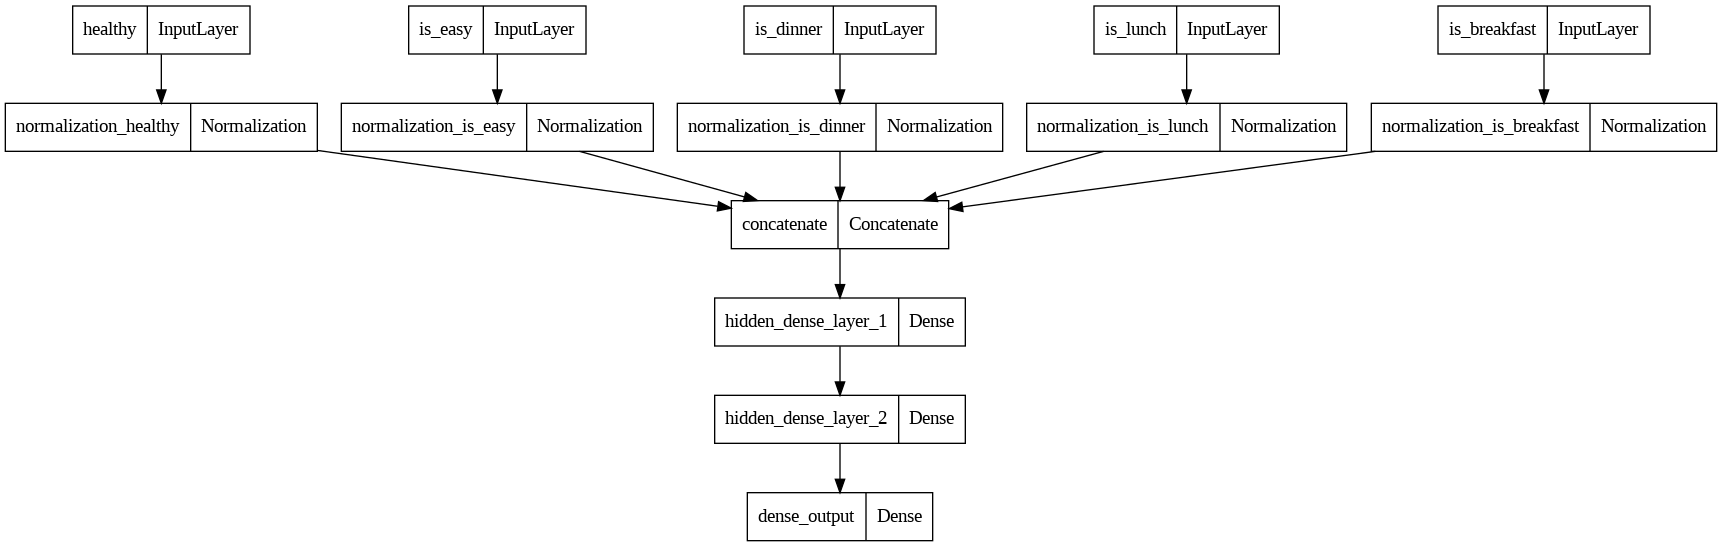

In [76]:
tf.keras.utils.plot_model(dnn_model) #showing model

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

In [98]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "rating"

validation_split = 0.2

In [101]:
history = dnn_model.fit(
    x=features,
    y=label_name,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_split= 0.2)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

ValueError: ignored

NameError: ignored

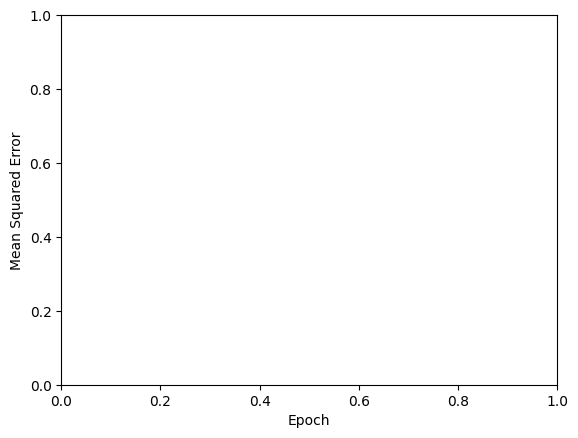

In [102]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [103]:
print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x={name:np.array(value) for name, value in X_test.items()},
    y=np.array(y_test.values),
    batch_size=1000,
    return_dict=True)


 Evaluate the new model against the test set:


ValueError: ignored

-----

# Midterm Submission

To submit this exam, in Canvas navigate to DATA-2000-51 > Assignments > Midterm Exam ([link](https://canvas.jcu.edu/courses/33514/assignments/407120)). You can either upload the `.ipynb` file directly to Canvas, or you can provide a link to the assignment on your GitHub.